In [15]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

### 정규화
 이미지 픽셀값이 0~255 사이 값을 가지는데, 픽셀 값을 255로 나누어서 0과 1사이의 값으로 변환

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

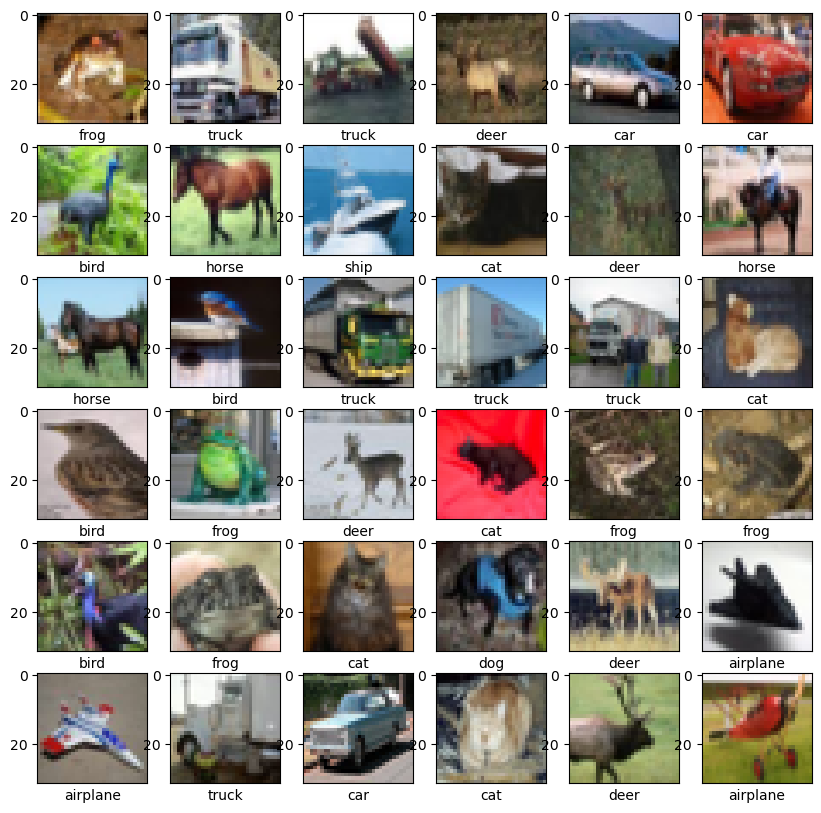

In [51]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Functional API
functional api를 사용하여 모델 구성

In [35]:
#model1
inputs1 = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),activation = 'relu')(inputs1)
#과적합 방지하고 계산 효율성 높임
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)
#Fully Connected Layer로 전달 하기 위해서 1차원 벡터로 변형
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
#신경망에서 과적합을 줄이고 모델의 일반화 성능을 향상
x = Dropout(0.5)(x)
outputs1 = Dense(10, activation = 'softmax')(x)

model1 = Model(inputs=inputs1, outputs=outputs1)

아키텍쳐 표시

In [36]:
model1.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#model2
inputs2 = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),activation = 'relu')(inputs2)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = 'relu')(x)
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
outputs2 = Dense(10, activation = 'softmax')(x)

model2 = Model(inputs=inputs2, outputs=outputs2)

In [38]:
model2.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = model1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7127 - loss: 0.8092 - val_accuracy: 0.6929 - val_loss: 0.8955
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7238 - loss: 0.7708 - val_accuracy: 0.6999 - val_loss: 0.8802
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7273 - loss: 0.7643 - val_accuracy: 0.7097 - val_loss: 0.8548
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7361 - loss: 0.7313 - val_accuracy: 0.7104 - val_loss: 0.8611
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7398 - loss: 0.7248 - val_accuracy: 0.7101 - val_loss: 0.8749
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7504 - loss: 0.6951 - val_accuracy: 0.7163 - val_loss: 0.8676
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7568 - loss: 0.6655 - val_accuracy: 0.7102 - val_loss: 0.8840
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7610 - loss: 0

In [42]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8112 - loss: 0.5380 - val_accuracy: 0.7186 - val_loss: 0.8781
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8280 - loss: 0.4869 - val_accuracy: 0.7207 - val_loss: 0.8931
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8408 - loss: 0.4569 - val_accuracy: 0.7127 - val_loss: 0.9284
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8510 - loss: 0.4199 - val_accuracy: 0.7062 - val_loss: 0.9910
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8625 - loss: 0.3912 - val_accuracy: 0.7128 - val_loss: 0.9908
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8719 - loss: 0.3564 - val_accuracy: 0.7106 - val_loss: 1.0405
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8830 - loss: 0.3348 - val_accuracy: 0.7125 - val_loss: 1.0853
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8917 - loss: 0

313/313 - 1s - 2ms/step - accuracy: 0.7070 - loss: 0.9014
0.7070000171661377


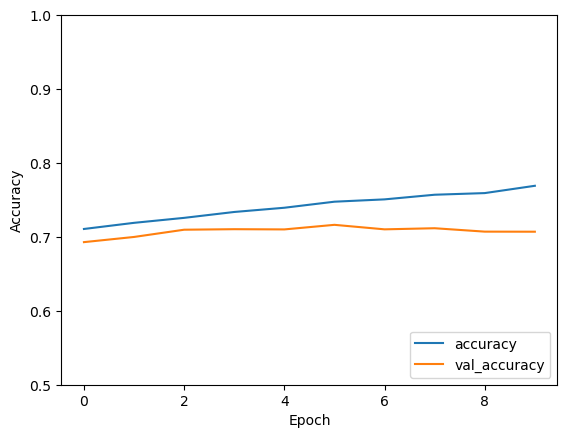

In [49]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels, verbose=2)
print(test_acc1)

313/313 - 1s - 2ms/step - accuracy: 0.7028 - loss: 1.2381
0.7027999758720398


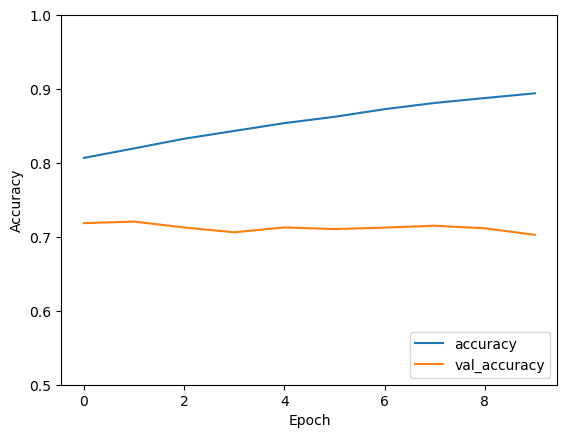

In [50]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels, verbose=2)
print(test_acc2)

### 간단한 테스트

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted class: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted class: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted class: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted class: 1


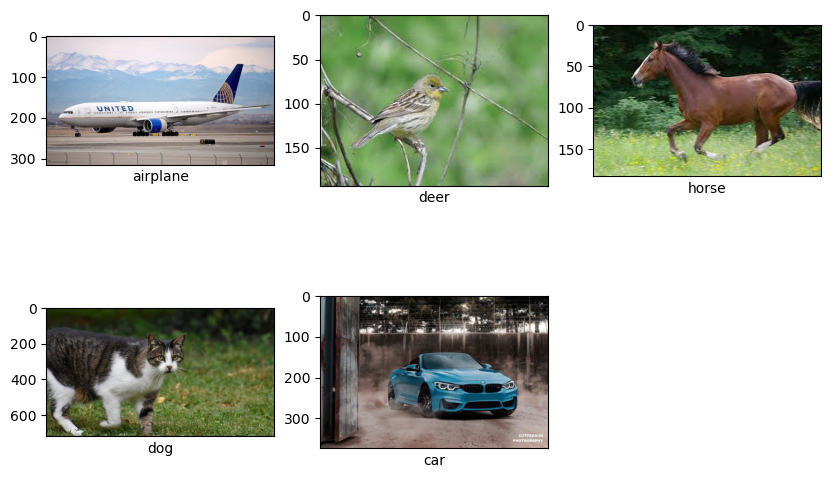

In [55]:
from PIL import Image
import numpy as np
import os

class_names = ['airplane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 로드
folder_path = "/Users/hongseunghyeog/Documents/img"
files = os.listdir(folder_path)
plt.figure(figsize=(10,10))
i=0
for file in files:
    image = Image.open(os.path.join(folder_path,file))
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.imshow(image)
    plt.xlabel(class_names[train_labels[i][0]])
    image = image.resize((32, 32))  # 모델이 기대하는 크기로 조정
    image = np.array(image) / 255.0  # 픽셀 값 범위를 [0, 1]로 정규화
    image = np.expand_dims(image, axis=0)  # 배치 차원을 추가하여 모델이 기대하는 형식으로 변환
    # 이미지를 모델에 전달하여 예측 생성
    predictions = model1.predict(image)
    # 예측 결과 출력
    predicted_class = np.argmax(predictions)
    plt.xlabel(class_names[predicted_class])
    print("Predicted class:", predicted_class)
    i+=1